[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jesherjoshua/seds-spaceweek-2022/blob/mothership/pulsars/pulsars.ipynb)

In [416]:
#!git clone https://github.com/jesherjoshua/WSW_datasets

In [417]:
import numpy as np
from astropy.io import fits
from time import time
from time import perf_counter
import sys
import os
from timeit import timeit
import random
import matplotlib.pyplot as plt 

# WHAT ARE PULSARS ? 🧐

From Earth, pulsars often look like flickering stars✨. On and off, on and off, they seem to blink with a regular rhythm. But the light from pulsars does not actually flicker or pulse, and these objects are not actually stars. 

There are different types of **Pulsars**:
 - X-ray Pulsars
 - Radio Pulsars .etc

**Pulsars radiate two steady, narrow beams of light in opposite directions.** Although the light from the beam is steady, pulsars appear to flicker because they also spin.
![pulsar](/content/WSW_datasets/pulsar.gif)

## ABOUT THE DATASET 🤓
The Dataset contains images of a part of the sky where the location of a pulsar is confirmed. The images are in the **fits** (Flexible Image Transport System) format. We will be using the **astropy** package to open and access these fits format images. The Data is collected from the Murchison Widefield Array (**MWA**) in Australia. The Dataset is already pre-processed and is centered to the faintest the quasar signal in said image. 

## MORE ABOUT THE MWA: 🔭
The Murchison Widefield Array (MWA) is a low-frequency radio telescope in Western Australia. The front-end of the MWA consists of 4,096 spider-like antennas arranged in 256 regular grids called ‘tiles’, spread over several kilometres within the Murchison Radio-astronomy Observatory (MRO).
The MWA’s particular attributes include:

- a very wide field of view (hundreds of square degrees)
- high angular resolution (several arcminutes)
- wide frequency range (70–300 MHz) with flexible tuning, and
![MWA](/content/WSW_datasets/MWA.png)

### LOAD DATA💿
**lets get a list of the files in the directory**

In [418]:
samples = sorted(os.listdir('/content/WSW_datasets/pulsars_fits_11/'))
files=sorted(os.listdir('/content/WSW_datasets/pulsars_fits_1000/'))
print("No. of files in fits_11: ",len(samples))
print("No.of files in fits_1000: ",len(files))

No. of files in fits_11:  12
No.of files in fits_1000:  1000


In [419]:
type(fits.open('/content/WSW_datasets/pulsars_fits_1000/0000.fits')[0].data)

numpy.ndarray

In [420]:
fits.open('/content/WSW_datasets/pulsars_fits_1000/0000.fits')[0].data


array([[-0.7745181 , -0.73908204, -0.6005262 , ...,  0.34669855,
         0.8131576 ,  1.1821327 ],
       [-0.229256  , -0.22427854, -0.11844701, ...,  0.4970297 ,
         1.1316785 ,  1.4763066 ],
       [ 0.406827  ,  0.28493252,  0.21240866, ...,  0.20018946,
         0.61631805,  0.72288436],
       ...,
       [ 0.43426645,  0.04111832, -0.13299538, ...,  0.119355  ,
        -0.89265126, -1.5180509 ],
       [ 0.99673223,  0.6130045 ,  0.26611248, ..., -0.66624427,
        -1.4326385 , -2.0074408 ],
       [ 1.3347961 ,  0.9444515 ,  0.55870944, ..., -0.36535567,
        -0.8280291 , -1.0653447 ]], dtype=float32)

**hmm the data is in the form of a numpy array why is that ?**

# WHY NUMPY ?🤨
**lets find out by performing a few basic arithmetic operations**

In [421]:
lis= random.sample(range(10**5),1000)
np_array=np.array(lis)
print(lis)

[97366, 10908, 28788, 36525, 4774, 70158, 54857, 62354, 58563, 75273, 65707, 54986, 19765, 44980, 45919, 31878, 34734, 80894, 23718, 13705, 13255, 82572, 82327, 85927, 20102, 30965, 83814, 82867, 66449, 68489, 37235, 64683, 47658, 5843, 67907, 36194, 65190, 91890, 17172, 26945, 62514, 68700, 11054, 63220, 69576, 65176, 6993, 84301, 82126, 32308, 12167, 48790, 77478, 40277, 58607, 63182, 12046, 27248, 22048, 64545, 59008, 96737, 74761, 3160, 44428, 46980, 84810, 43161, 24952, 77542, 95384, 56670, 39806, 73054, 11591, 69297, 78244, 86620, 30304, 56247, 15388, 94838, 25002, 99371, 76361, 38696, 32187, 58529, 3875, 76695, 49444, 95295, 42536, 91898, 66467, 17233, 10093, 75788, 40765, 39625, 48367, 76927, 29402, 95170, 71034, 58838, 93743, 57806, 48232, 87295, 79081, 75332, 69631, 12631, 85320, 97120, 60403, 51741, 24767, 13592, 18414, 38826, 49633, 25771, 13604, 14898, 44810, 27867, 84489, 64710, 93446, 32297, 91188, 16846, 35038, 31079, 19752, 55393, 50883, 48674, 53749, 94242, 27461, 767

## Numpy array 🆚 List (Mean)

In [422]:
#list - operations


s = "sum(lis)/len(lis)"
timeit(s,setup ="import random; lis= random.sample(range(10**5),1000)",number=1000)

0.003022791001058067

In [423]:
#using the mean function from the statistics module


s="mean(lis)"
timeit(s,setup ="import random; from statistics import mean; lis= random.sample(range(10**5),1000)",number=1000)


0.24788908399932552

In [424]:
#np


s="np.divide(np.sum(lis),len(lis))"
timeit(s,setup="import numpy as np; import random;lis= np.array(random.sample(range(10**5),1000))",number=1000)

0.00407449999875098

## Numpy array 🆚 List (Median)

In [425]:
#list - operations

s = """n=len(lis)
mid=int(n/2)
list=sorted(lis)
if(n%2==0):
    median=(list[mid]+list[mid-1])/2
else:
    median=list[mid]"""

timeit(s,setup="import random;lis= random.sample(range(10**5),1000);",number=1000)

0.04854258300110814

In [426]:
#using the median method from the statistics module


s="median(lis)"

timeit(s,setup="import random;from statistics import median; lis= random.sample(range(10**5),1000);",number=1000)

0.047889375000522705

In [427]:
#np
s = """median=np.median(lis)"""
timeit(s,setup="import numpy as np; import random;lis= np.array(random.sample(range(10**5),1000))",number=1000)


0.00947016700047243

# DATA EXPLORATION 🗺

## Sample Set

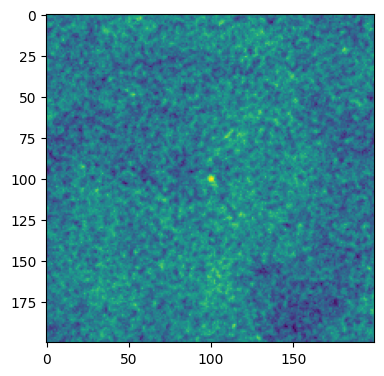

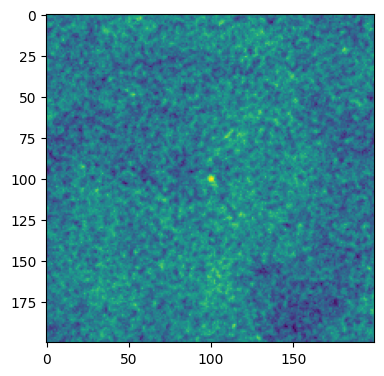

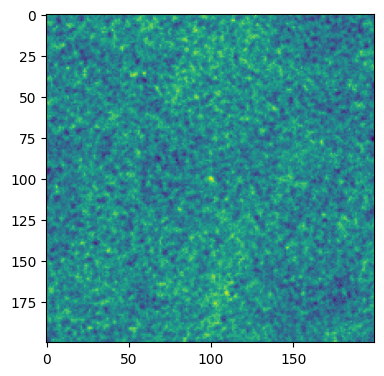

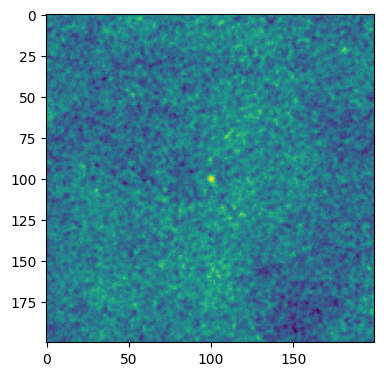

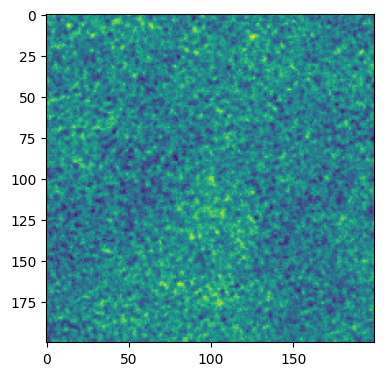

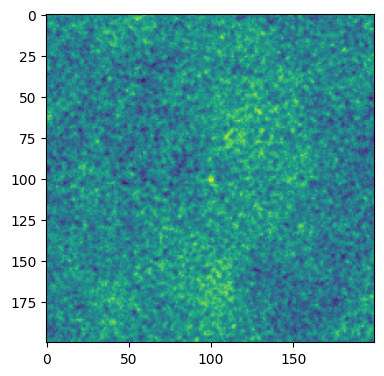

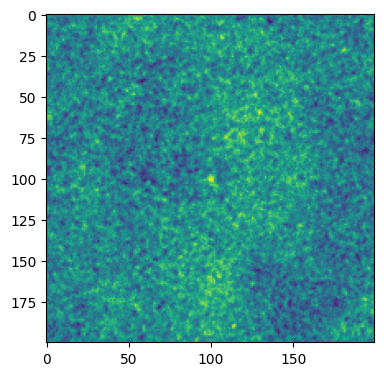

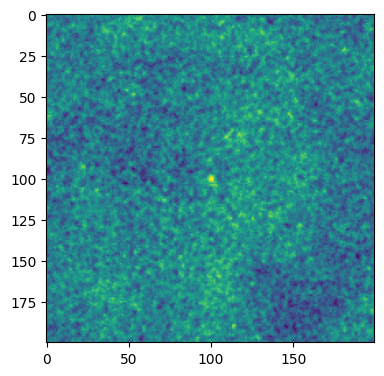

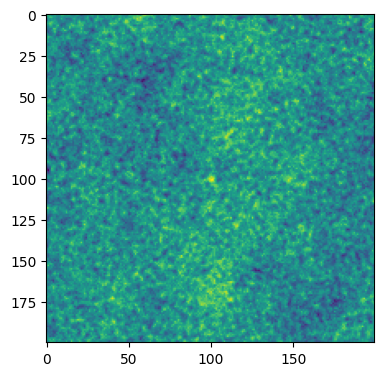

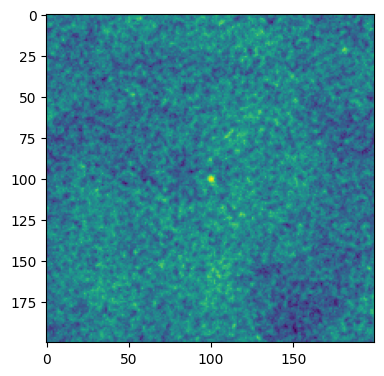

In [428]:

for i in range(10):
    fh=fits.open('/content/WSW_datasets/pulsars_fits_11/'+samples[i])
    data = fh[0].data
    plt.figure(figsize=(50,50))
    plt.subplot(1,10,i+1)
    #plt.tight_layout()
    plt.imshow(data)
    #plt.title(files[i])

## Actual Dataset

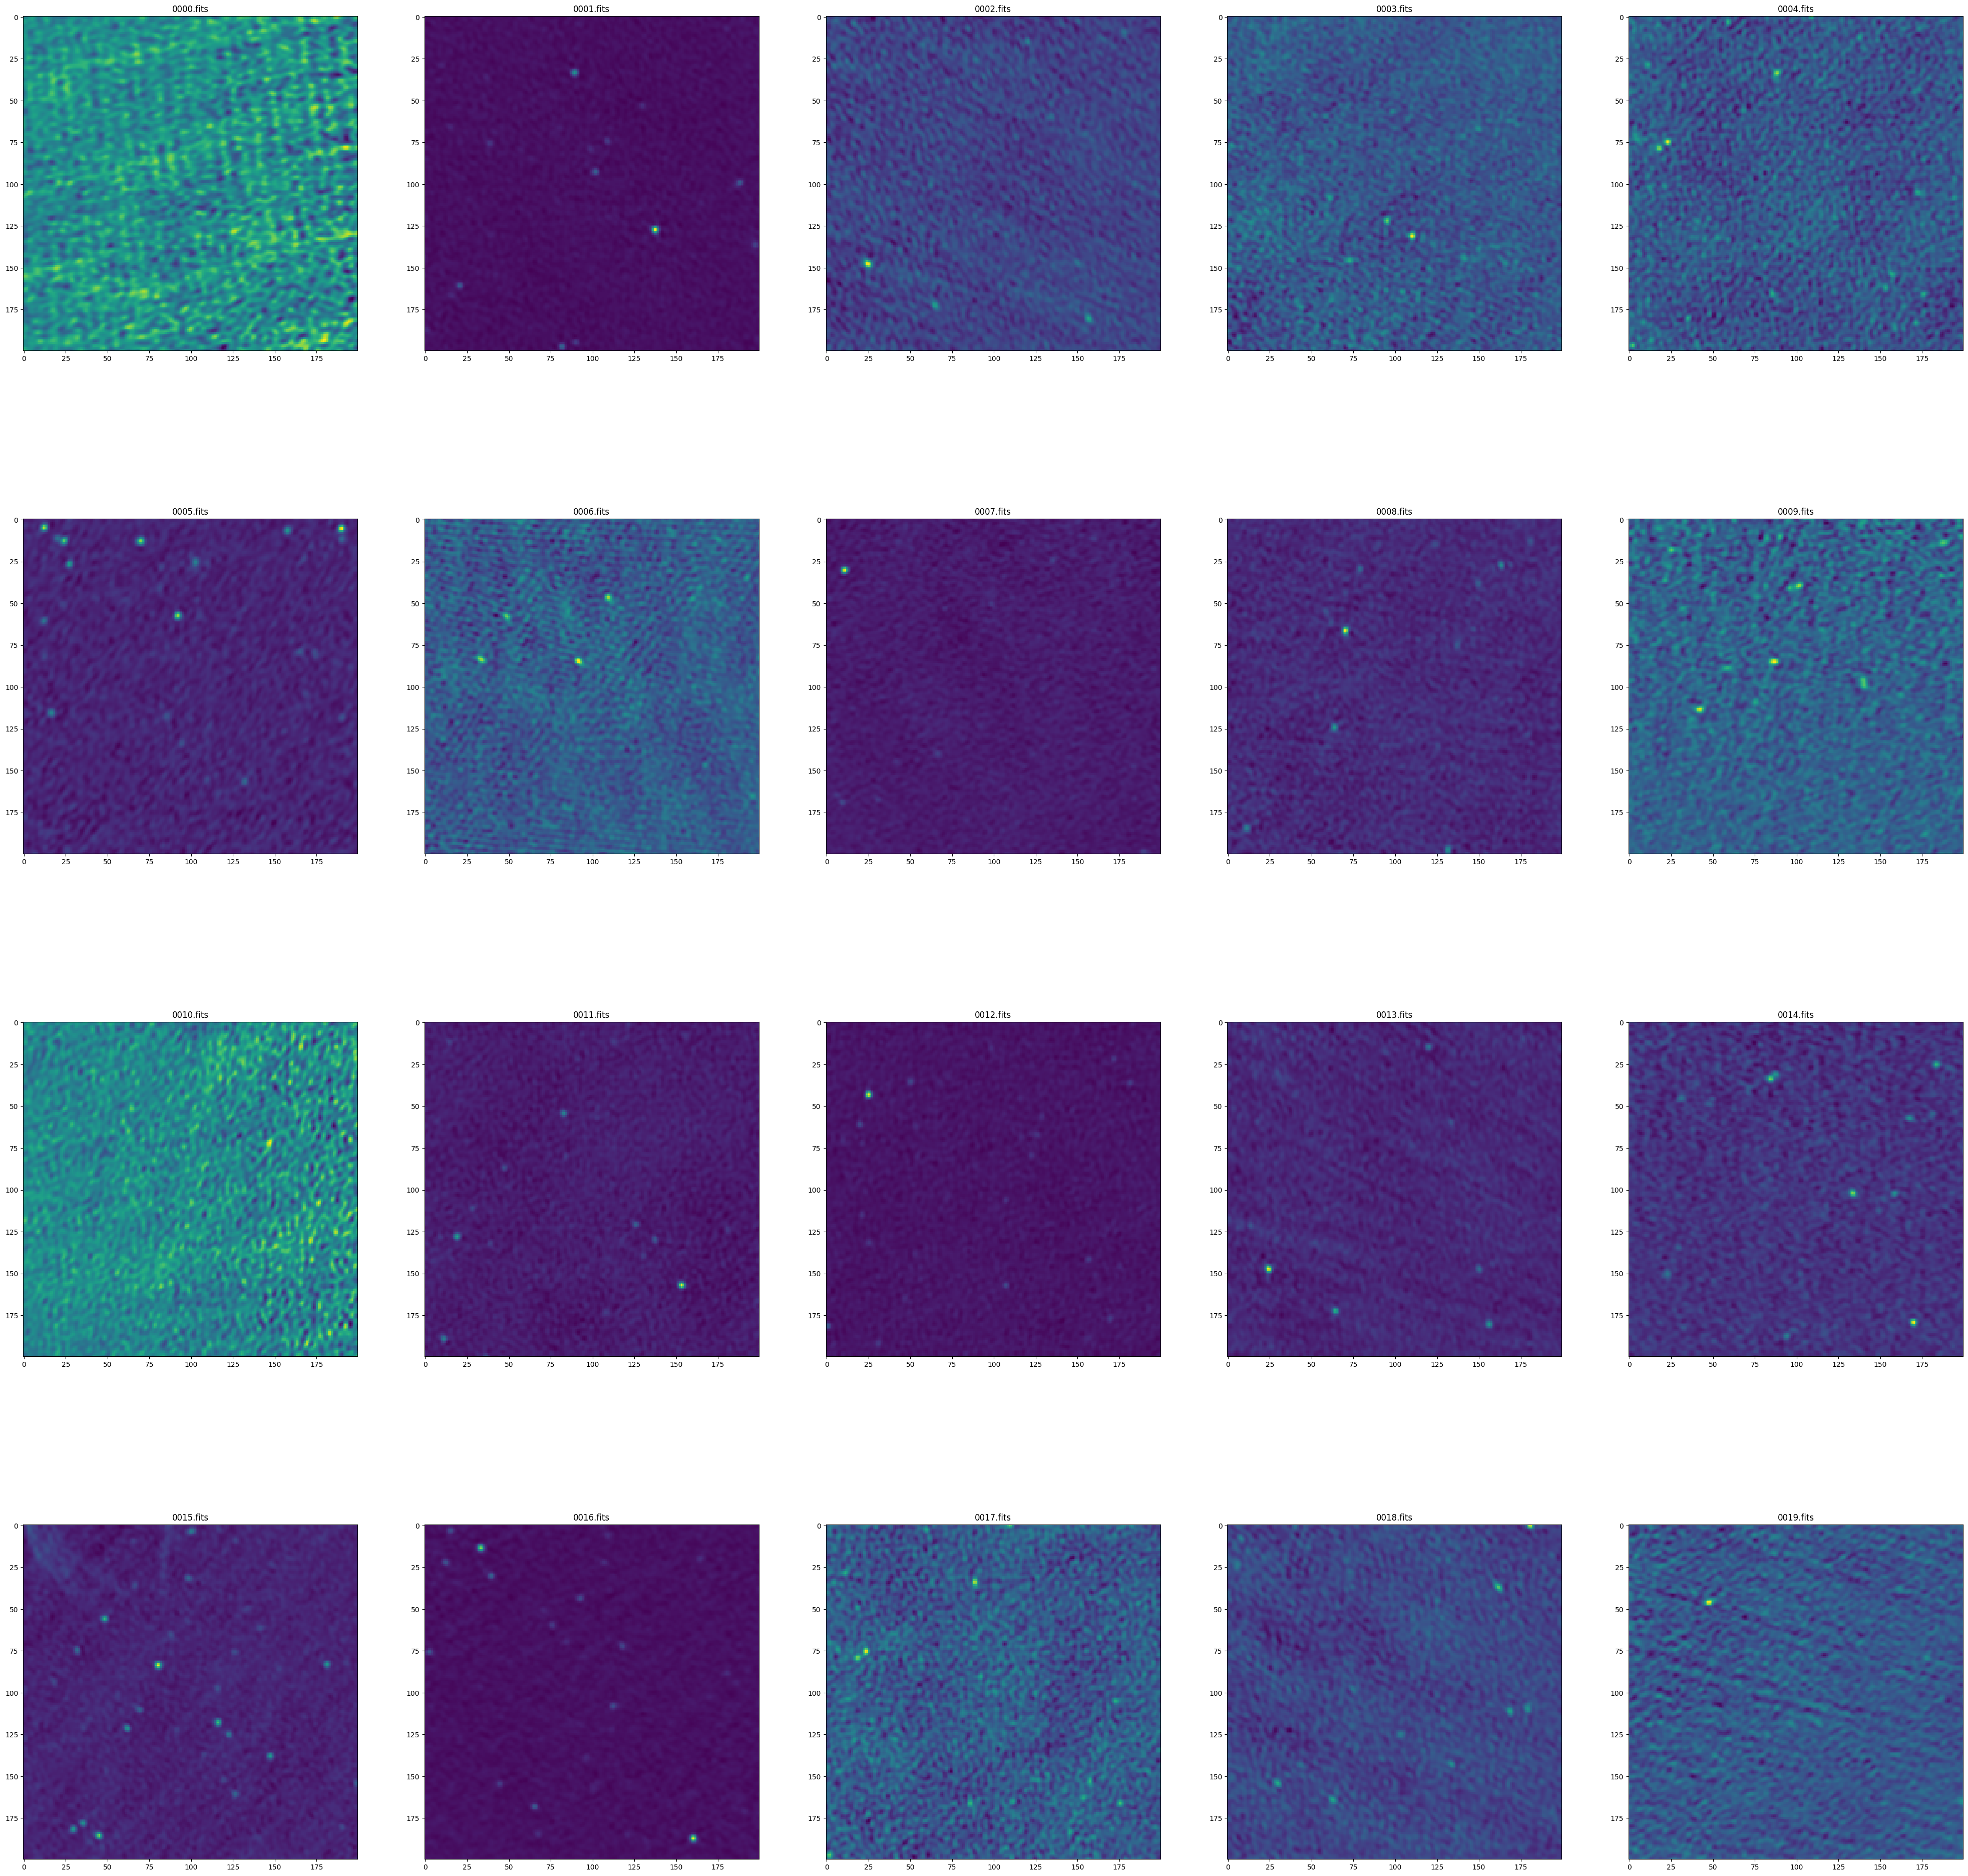

In [429]:
plt.figure(figsize=(50,50))
for i in range(20):
    fh=fits.open('/content/WSW_datasets/pulsars_fits_1000/'+files[i])
    data = fh[0].data
    plt.subplot(4,5,i+1,)
    #plt.tight_layout()
    plt.imshow(data)
    plt.title(files[i])

# RECOGNIZING PULSARS

# MEAN STACKING TO DETECT UNDERLYING PULSARS

## Using Minimal Sample Set

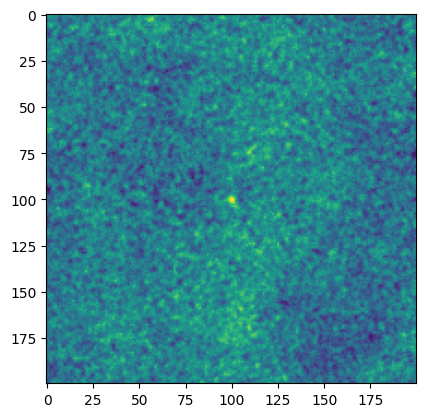

In [430]:
data=0
for i in range(len(samples)):
    data+=fits.open('/content/WSW_datasets/pulsars_fits_11/'+samples[i])[0].data
avg=data/len(samples)
plt.imshow(avg)

In [431]:
type(data)

numpy.ndarray

## Using a Larger Dataset 𖡻

Time taken:  1.2020649909973145


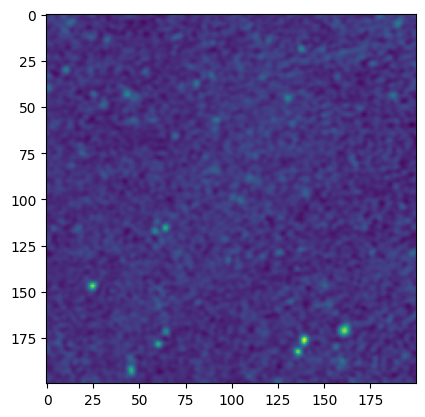

In [432]:
acc=0
start=time()
for i in range(len(files)):
    acc+=fits.open('/content/WSW_datasets/pulsars_fits_1000/'+files[i])[0].data
mean=acc/len(files)
end=time()-start
print('Time taken: ',end)
plt.imshow(mean)

Time taken:  0.7963778972625732


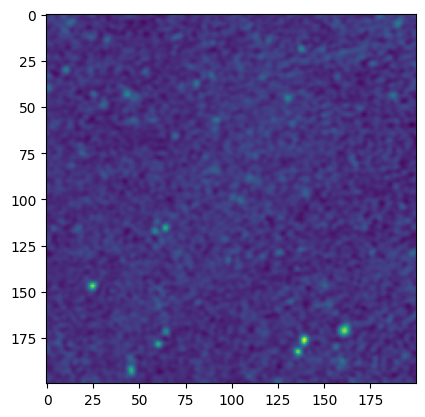

In [433]:
acc=0
start=time()
for i in range(len(files)):
    acc+=fits.open('/content/WSW_datasets/pulsars_fits_1000/'+files[i])[0].data
mean=np.divide(acc,len(files))
end=time()-start
print('Time taken: ',end)
plt.imshow(mean)

**Mean Stacking** with the Sample Set reveals the presence of a **Pulsar**. But, doing the same with the entire dataset shows the lack of a **Pulsar**



### **Did the computer make a mistake? Where did the Pulsar go? is there another way?** 😩

# ANALYZING USING MEDIAN STACK 🤔

## Using all the data

Time taken:  1.2998909950256348


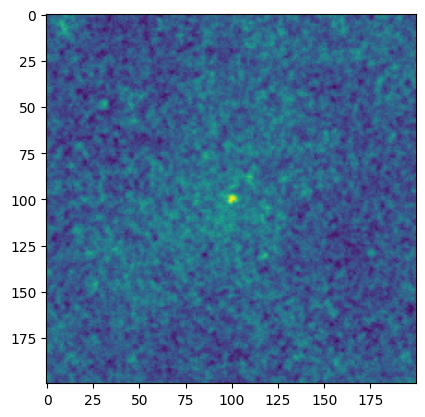

In [434]:
l=[]
start=time()
for i in range(len(files)):
    l.append(fits.open('/content/WSW_datasets/pulsars_fits_1000/'+files[i])[0].data)
median_stack=np.dstack(l)
median=np.median(median_stack,axis=2)
end=time()-start
print('Time taken: ',end)
plt.imshow(median)

**And the Pulsar is Visible again...** 🤩

In [435]:
median_stack.ndim

3

## Using the Minimal Sample Set

Time taken:  0.03613686561584473


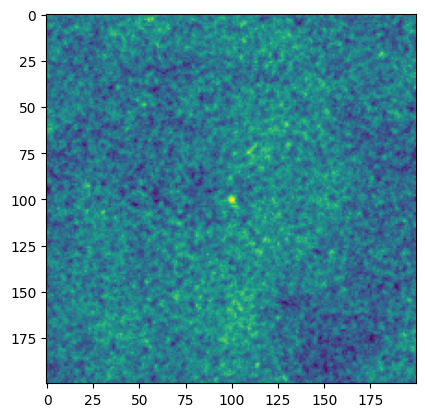

In [436]:
l=[]
start=time()
for i in range(len(samples)):
    l.append(fits.open('/content/WSW_datasets/pulsars_fits_11/'+samples[i])[0].data)
median_stack=np.dstack(l)
median=np.median(median_stack,axis=2)
end=time()-start
print('Time taken: ',end)
plt.imshow(median)

# Why does the median perform better than the mean at this task ? 😵‍💫

**let's understand with an example**

In [449]:
arr=np.array([1,2,3,4,5,10,25,200])
print("Mean of the array: ",np.mean(arr))
print("Median of the array: ",np.median(arr))

Mean of the array:  31.25
Median of the array:  4.5


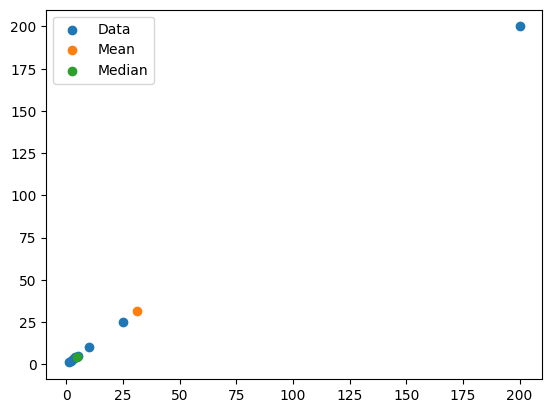

In [450]:
plt.scatter(arr,arr)
plt.scatter(np.mean(arr),np.mean(arr))
plt.scatter(np.median(arr),np.median(arr))
plt.legend(['Data','Mean','Median'])

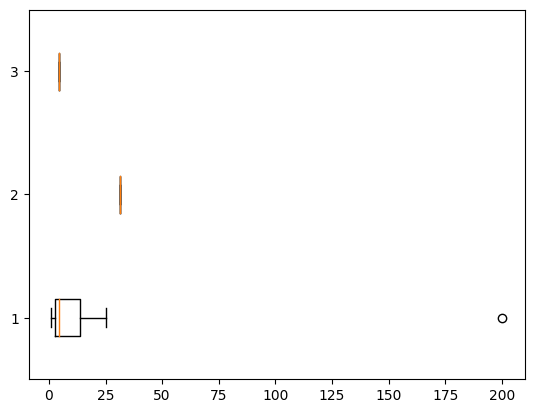

In [451]:
plt.boxplot([arr,np.mean(arr),np.median(arr)],vert=False)
plt.show()

We infer from the above experiment:
**The Median is more resistant to outliers rather than the Mean**

# A Quick Recap: 👾
 - Pulsars are spherical, compact objects that are about the size of a large city but contain more mass than the sun. And they spin 🌪
 - The MWA records🎥 the signatures of the Pulsars in the range of 70-300MHz(mostly radio pulsars)📻
 - One image can neither confirm nor deny the presence of a **Pulsar**, therefore we turn to image stacking🥞 to verify the presence of a **Pulsar**.
 - We explore the different measures to derive an inference, namely **Mean** & **Median**.
 - We Select the most robust👌 measure to arrive at a conclusion. 

# 🙏 **Thank You!** 🙏

*PS: for more information checkout the references section*